<a href="https://colab.research.google.com/github/jackielpp/nusdevops/blob/main/Equities_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 8.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [7]:
import yfinance as yf
import math
import numpy as np
import pandas as pd

In [8]:
stock_symbol = "M44U.SI"
benchmark_symbol = "^STI"
start = "2021-1-1"
end = "2021-12-31"

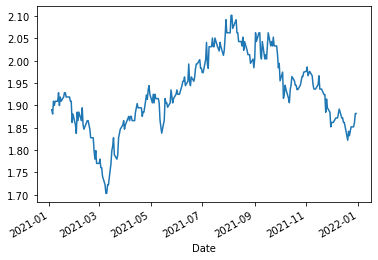

In [9]:
#stock check
hist_stock = yf.Ticker(stock_symbol).history(start=start, end=end)
hist_stock
hist_stock ["Close"].plot()

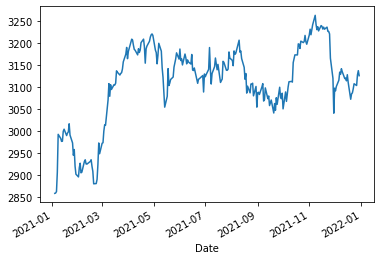

In [10]:
#benchmark check
hist_benchmark = yf.Ticker(benchmark_symbol).history(start=start, end=end)
hist_benchmark
hist_benchmark ["Close"].plot()

In [13]:
def BASS(stock_symbol, benchmark_symbol,start, end):

  #Prepare data with returns. Normal returns are used. Can also use log returns
  df = pd.DataFrame()
  df['Benchmark'] = yf.Ticker(benchmark_symbol).history(start=start, end=end).Close
  df['Stock'] = yf.Ticker(stock_symbol).history(start=start, end=end).Close
  df['Benchmark_Returns'] = df['Benchmark'].pct_change()
  df['Stock_Returns'] = df['Stock'].pct_change()
  df = df.dropna()

  #calculate Beta
  cov = df['Benchmark_Returns'].cov(df['Stock_Returns'])
  var = df['Benchmark_Returns'].var()
  beta = cov /var
  beta = round(beta, 2)

  #calculate Alpha
  benchmark_abs_returns = (df['Benchmark'][-1] - df['Benchmark'][0]) / df['Benchmark'][0]
  stock_abs_returns = (df['Stock'][-1] - df['Stock'][0]) / df['Stock'][0]
  alpha = (stock_abs_returns - beta * benchmark_abs_returns) * 1000
  alpha = round(alpha, 2)

  #calculate Standard deviation of stock
  std_dev = (df['Stock_Returns'].std()) * 100
  std_dev = round(std_dev, 2)

  #calculate Sharpe Ratio of Stock
  avg_returns = df['Stock_Returns'].mean()
  std = df['Stock_Returns'].std()
  daily_SR = avg_returns / std
  annual_SR = daily_SR * (252**0.5)
  annual_SR = round(annual_SR, 2)

  return beta, alpha, std_dev, annual_SR



In [15]:
A = BASS(stock_symbol, benchmark_symbol, start, end)

In [16]:
A

(0.75, -69.46, 1.02, 0.05)

In [2]:
all_stocks = ["C52.SI", "U96.SI", "C38U.SI", "G13.SI", "D01.SI", "BN4.SI"]

In [19]:
stock_name =[]
beta_value= []
alpha_value = []
std_dev_value = []
sharpe_ratio_value = []

for i in all_stocks:
  try:
    BASS_output = BASS(i, benchmark_symbol, start, end)
    beta_value.append(BASS_output[0])
    alpha_value.append(BASS_output[1])
    std_dev_value.append(BASS_output[2])
    sharpe_ratio_value.append(BASS_output[3])
    stock_name.append(i)
  except:
    pass

  output_df =pd.DataFrame()
  output_df["stock"] = stock_name
  output_df["beta"] = beta_value
  output_df["alpha(%)"] = alpha_value
  output_df["standard_deviation(%)"] = std_dev_value
  output_df["sharpe"] = sharpe_ratio_value

  #print (output_df)
  print (output_df.sort_values(by="sharpe", ascending = False))

    stock  beta  alpha(%)  standard_deviation(%)  sharpe
0  C52.SI  0.99   -225.39                   1.25   -0.69
    stock  beta  alpha(%)  standard_deviation(%)  sharpe
1  U96.SI  1.16     88.18                   1.68    0.81
0  C52.SI  0.99   -225.39                   1.25   -0.69
     stock  beta  alpha(%)  standard_deviation(%)  sharpe
1   U96.SI  1.16     88.18                   1.68    0.81
2  C38U.SI  0.88   -105.71                   1.12   -0.02
0   C52.SI  0.99   -225.39                   1.25   -0.69
     stock  beta  alpha(%)  standard_deviation(%)  sharpe
1   U96.SI  1.16     88.18                   1.68    0.81
2  C38U.SI  0.88   -105.71                   1.12   -0.02
3   G13.SI  0.86   -163.49                   1.18   -0.40
0   C52.SI  0.99   -225.39                   1.25   -0.69
     stock  beta  alpha(%)  standard_deviation(%)  sharpe
1   U96.SI  1.16     88.18                   1.68    0.81
2  C38U.SI  0.88   -105.71                   1.12   -0.02
3   G13.SI  0.86   